# The GitHub History of the Scala Language


*   1. Scala's real-world project repository data
*   2. Preparing and cleaning the data
*   3. Merging the DataFrames
*   4. Is the project still actively maintained?
*   5. Is there camaraderie in the project?
*   6. What files were changed in the last ten pull requests?
*   7. Who made the most pull requests to a given file?
*   8. Who made the last ten pull requests on a given file?
*   9. The pull requests of two special developers
*   10. Visualizing the contributions of each developer





In [16]:
# Importing pandas
import pandas as pd

# Loading in the data
pulls_one = pd.read_csv('/content/drive/MyDrive/DATA CAMP/Data/pulls_2011-2013.csv')
pulls_two = pd.read_csv('/content/drive/MyDrive/DATA CAMP/Data/pulls_2014-2018.csv')
pull_files = pd.read_csv('/content/drive/MyDrive/DATA CAMP/Data/pull_files.csv')

print(pulls_one)
print(pulls_two)
print(pull_files)

           pid         user                  date
0     11166973  VladimirNik  2013-12-31T23:10:55Z
1     11161892      Ichoran  2013-12-31T16:55:47Z
2     11153894      Ichoran  2013-12-31T02:41:13Z
3     11151917      rklaehn  2013-12-30T23:45:47Z
4     11131244        qerub  2013-12-29T17:21:01Z
...        ...          ...                   ...
3291    547941      xeno-by  2011-12-01T16:16:42Z
3292    547354      szeiger  2011-12-01T14:03:23Z
3293    547150      odersky  2011-12-01T12:39:40Z
3294    547003      robinst  2011-12-01T11:42:26Z
3295    546847      odersky  2011-12-01T10:41:01Z

[3296 rows x 3 columns]
            pid       user                  date
0     163314316     hrhino  2018-01-16T23:29:16Z
1     163061502   joroKr21  2018-01-15T23:44:52Z
2     163057333  mkeskells  2018-01-15T23:05:06Z
3     162985594      lrytz  2018-01-15T15:52:39Z
4     162838837  zuvizudar  2018-01-14T19:16:16Z
...         ...        ...                   ...
2899   11244241     folone  2014

In [17]:
# Append pulls_one to pulls_two
pulls = pulls_one.append(pulls_two)

# Convert the date for the pulls object
pulls['date'] = pd.to_datetime(pulls['date'], utc=True)

In [18]:
# Merge the two DataFrames
data = pulls.merge(pull_files, on='pid')

In [19]:
data.head()

,pid,user,date,file
0,11166973,VladimirNik,2013-12-31 23:10:55+00:00,src/reflect/scala/reflect/api/Printers.scala
1,11166973,VladimirNik,2013-12-31 23:10:55+00:00,src/reflect/scala/reflect/internal/Printers.scala
2,11166973,VladimirNik,2013-12-31 23:10:55+00:00,test/files/run/reify_ann3.check
3,11166973,VladimirNik,2013-12-31 23:10:55+00:00,test/junit/scala/reflect/internal/PrintersTest...
4,11161892,Ichoran,2013-12-31 16:55:47+00:00,src/library/scala/collection/mutable/ArrayOps....


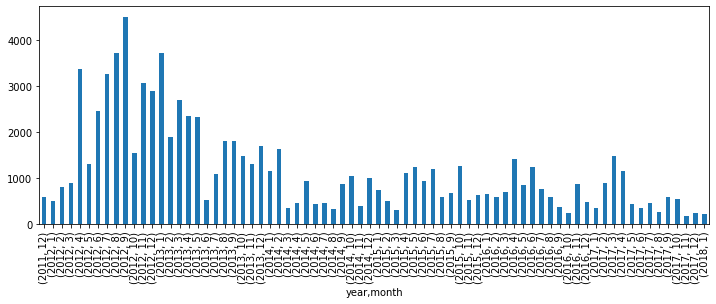

In [20]:
%matplotlib inline

# Create a column that will store the month
data['month'] = data['date'].dt.month

# Create a column that will store the year
data['year'] = data['date'].dt.year

# Group by the month and year and count the pull requests
counts = data.groupby(['year','month'])['pid'].count()

# Plot the results
counts.plot(kind='bar', figsize = (12,4))

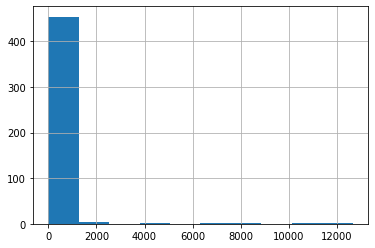

In [21]:
# Required for matplotlib
%matplotlib inline

# Group by the submitter
by_user = data.groupby('user')['pid'].count()

# Plot the histogram
by_user.hist()

In [22]:
# Identify the last 10 pull requests
last_10 = pulls.sort_values(by='date').tail(10)
last_10

# Join the two data sets
joined_pr = pull_files.merge(last_10, on='pid')

# Identify the unique files
files = set(joined_pr['file'])

# Print the results
files

{'LICENSE',
 'doc/LICENSE.md',
 'doc/License.rtf',
 'project/VersionUtil.scala',
 'src/compiler/scala/reflect/reify/phases/Calculate.scala',
 'src/compiler/scala/tools/nsc/backend/jvm/BCodeHelpers.scala',
 'src/compiler/scala/tools/nsc/backend/jvm/PostProcessor.scala',
 'src/compiler/scala/tools/nsc/backend/jvm/analysis/BackendUtils.scala',
 'src/compiler/scala/tools/nsc/profile/AsyncHelper.scala',
 'src/compiler/scala/tools/nsc/profile/Profiler.scala',
 'src/compiler/scala/tools/nsc/symtab/classfile/ClassfileParser.scala',
 'src/compiler/scala/tools/nsc/typechecker/Contexts.scala',
 'src/library/scala/Predef.scala',
 'src/library/scala/concurrent/Lock.scala',
 'src/library/scala/util/Properties.scala',
 'src/reflect/scala/reflect/internal/pickling/ByteCodecs.scala',
 'src/reflect/scala/reflect/internal/tpe/GlbLubs.scala',
 'src/scaladoc/scala/tools/nsc/doc/html/page/Entity.scala',
 'src/scalap/decoder.properties',
 'test/files/neg/leibniz-liskov.check',
 'test/files/neg/leibniz-liskov

In [23]:
# This is the file we are interested in:
file = 'src/compiler/scala/reflect/reify/phases/Calculate.scala'


# Identify the commits that changed the file
file_pr = data[data['file'] == file]

# Count the number of changes made by each developer
author_counts = file_pr.groupby('user').count()

# Print the top 3 developers
print(author_counts.nlargest(3,'file'))

          pid  date  file  month  year
user                                  
xeno-by    11    11    11     11    11
retronym    5     5     5      5     5
soc         4     4     4      4     4


In [24]:
file = 'src/compiler/scala/reflect/reify/phases/Calculate.scala'

# Select the pull requests that changed the target file
file_pr = pull_files[pull_files['file'] == file]

# Merge the obtained results with the pulls DataFrame
joined_pr = pulls.merge(file_pr, on='pid')

# Find the users of the last 10 most recent pull requests
users_last_10 = set(joined_pr.nlargest(10,'date')['user'])

# Printing the results
users_last_10

{'bjornregnell', 'retronym', 'soc', 'starblood', 'xeno-by', 'zuvizudar'}

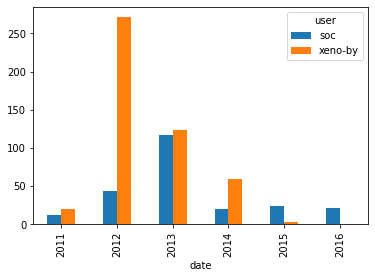

In [25]:
%matplotlib inline

# The developers we are interested in
authors = ['xeno-by', 'soc']

# Get all the developers' pull requests
by_author = pulls[pulls['user'].isin(authors)]

# Count the number of pull requests submitted each year
counts = by_author.groupby([by_author['user'], by_author['date'].dt.year]).agg({'pid': 'count'}).reset_index()

# Convert the table to a wide format
counts_wide = counts.pivot_table(index='date', columns='user', values='pid', fill_value=0)

# Plot the results
counts_wide.plot(kind='bar')

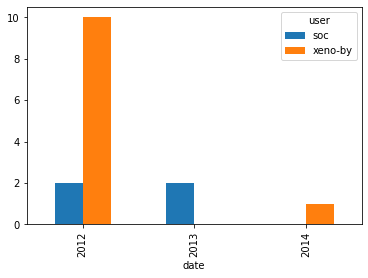

In [26]:
authors = ['xeno-by', 'soc']
file = 'src/compiler/scala/reflect/reify/phases/Calculate.scala'

# Select the pull requests submitted by the authors, from the `data` DataFrame
by_author = data[data['user'].isin(authors)]

# Select the pull requests that affect the file
by_file = by_author[by_author['file'] == file]

# Group and count the number of PRs done by each user each year
grouped = by_file.groupby(['user', by_file['date'].dt.year]).count()['pid'].reset_index()

# Transform the data into a wide format
by_file_wide = grouped.pivot_table(index='date',columns='user',values='pid',fill_value=0)

# Plot the results
by_file_wide.plot(kind='bar')